# Matematický software

## Cv. 8 - Metoda Monte Carlo

### 8.1 Úvod do metody

Metoda Monte Carlo byla poprvé použita v Manhattan projektu pro výzkum dynamiky řetězových reakcí vysoce obohaceného uranu. Světové špičky fyziky jako John von Neumann, Stanislaw Ulam a Nicholas Metropolis nedokázali tradiční cestou teoretické fyziky problémy řetězových reakcí vyřešit. Z toho důvodu navrhli výpočet pomocí metody Monte Carlo.

Dnes se metoda Monte Carlo používá v mnoha oblastech vědy a inženýrství pro různé typy aplikací. Příkladem může být finanční inženýrství (optimalizace portfolia akcií), výzkum nových léků (stochastické molekulární simulace), počítačová grafika ve videoherách (realistické osvětlení scény), počítačové fyziky (výpočet určitého integrálu) a v mnohých jiných oblastech.

Monte Carlo metodu lze stručně charakterizovat jako metodu, která opakuje experiment s náhodně zvolenými daty s velkým počtem opakování za účelem získání souhrnné statistiky z výsledků experimentu.

Postup:
1. Definice domény veličin (minimální, maximální hodnoty, omezení, atd.)
2. Generování náhodných veličin z pravděpodobnostního rozdělení, které jevu odpovídá (Gauss, rovnoměrné, troúuhelníkové, Poissonovo, atd.)
3. Provedení výpočtu nad náhodnými veličinami
4. Získání výsledku (souhrnné statistiky, histogramy, intervaly spolehlivosti)

#### Panna nebo orel?

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Pravdepodobnost padnuti orla:  0.0


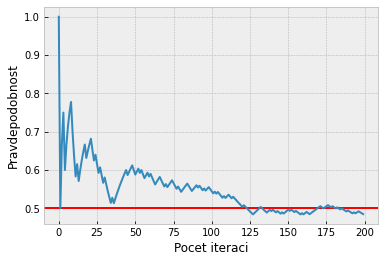

In [17]:
def hod_minci():
    return random.randint(0,1)

def monte_carlo(pocet_iteraci):
    okamzite_pravdepodobnosti = []
    soucet_hodnot = 0
    for ipokus in range(pocet_iteraci):
        vysledek_hodu = hod_minci()
        soucet_hodnot += vysledek_hodu
        okamzite_pravdepodobnosti.append(soucet_hodnot/(ipokus+1))
    plt.axhline(y=0.5, color="r", linestyle="-")
    plt.xlabel("Pocet iteraci")
    plt.ylabel("Pravdepodobnost")
    plt.plot(okamzite_pravdepodobnosti)
    return vysledek_hodu/pocet_iteraci

pravdepodobnost_orel = monte_carlo(200)
print("Pravdepodobnost padnuti orla: ", pravdepodobnost_orel)


#### Cvičení 1: Monty Hall problém

Představte si, že jste v televizní soutěži. Moderátor vám nabídne 3 dveře, které můžete otevřít. Jedny dveře ukrývají nový luxusní automobil a dvoje dvěře ukrývají kozu. Moderátor vás vyzve k výběru, vy si vyberete a otevřete (např.: dveře 1), ale nesmíte je otevřít. Moderátor následně otevře jedni ze dvou zbývajících dveří (např.: dveře 3) a odhalí za nimi kozu. Následně se moderátor zeptá, zda chcete změnit svůj výběr (dveře 1) na zbývající neotevřené dveře (dveře 2). Pokud chcete vyhrát automobil, bude větší šance ponechat si své dveře (dveře 1) nebo změnit volbu na zbývající dveře (dveře 2)?

Vaším úkolem je zjistit, zda je lepší změnit volbu dvěří. Důkaz proveďte pomocí metody Monte Carlo. Postup:
1. vytvořte seznam objektů za dveřmi, zamíchejte ho a proveďte náhodný výběr hráčem
2. moderátor odebere jednu kozu ze seznamu objektů za dvěřmi
3. hráč náhodně zvolí, zda změní volbu za zbývající objekt za dveřmi nebo si ponechá volbu
4. proveďte po zvolený počet iterací
5. nasčítejte, kolikrát by vyhrál změnou a kolikrát by vyhrál ponecháním
6. vhodně vizualizujte výsledky (například graf) nebo souhrnné číslo

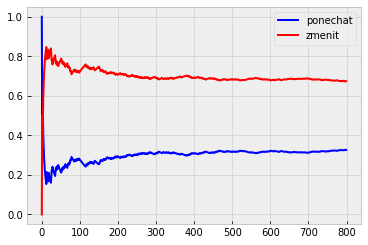

Sance na vyhru zmenou vyberu:  0.67375
Sance na vyhru ponechanim vyberu:  0.32625


In [99]:
from random import shuffle, choice

def monte_carlo_monty_hall(pocet_iteraci):
    pravdepodobnost_vyhry_ponechat = []
    pravdepodobnost_vyhry_zmenit = []
    pocet_vyher_zmena_dveri = 0
    pocet_vyher_ponechani_dveri = 0

    for iterace in range(pocet_iteraci):
        dvere = ["koza", "koza", "automobil"]
        shuffle(dvere)
        puvodni_volba_hrac = dvere.pop(dvere.index(choice(dvere)))
        #ve skutecnosti diky rozmichani shufflem neni nutne vybirat pomoci choice, stacil by pop
        #  ale timto zpusobem modelujeme spravne cely psychologicky proces v hlave hrace
        
        volba_moderator = dvere.pop(dvere.index("koza"))
        
        #lze to napsat do jednoho příkazu celé, ale pak to již nebude tak explicitní :)
        zmena_rozhodnuti = choice(["ano", "ne"])
        if zmena_rozhodnuti == "ano":
            if puvodni_volba_hrac == "koza":
                pocet_vyher_zmena_dveri += 1
            elif puvodni_volba_hrac == "automobil":
                pocet_vyher_ponechani_dveri += 1
        elif zmena_rozhodnuti == "ne":
            if puvodni_volba_hrac == "automobil":
                pocet_vyher_ponechani_dveri += 1
            elif puvodni_volba_hrac == "koza":
                pocet_vyher_zmena_dveri += 1
        
        pravdepodobnost_vyhry_zmenit.append(pocet_vyher_zmena_dveri/(iterace+1))
        pravdepodobnost_vyhry_ponechat.append(pocet_vyher_ponechani_dveri/(iterace+1))
    
    plt.plot(pravdepodobnost_vyhry_ponechat, "b", label="ponechat")
    plt.plot(pravdepodobnost_vyhry_zmenit, "r", label="zmenit")
    plt.legend()
    plt.show()
    print("Sance na vyhru zmenou vyberu: ", pravdepodobnost_vyhry_zmenit[-1])
    print("Sance na vyhru ponechanim vyberu: ", pravdepodobnost_vyhry_ponechat[-1])

monte_carlo_monty_hall(800)


### 8.2 Integrace metodou Monte Carlo

#### Výpočet hodnoty čísla PI

Pi =  3.1788


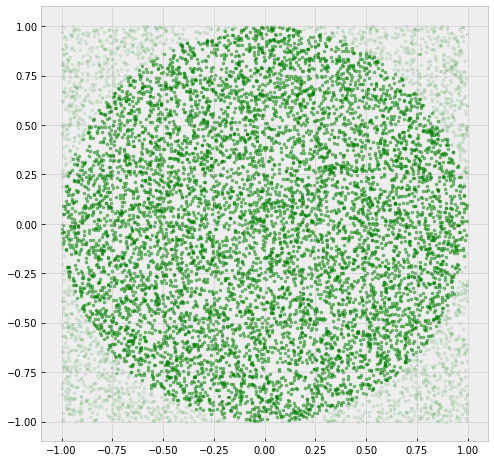

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=["png"]

def aproximace_pi_monte_carlo(pocet_pokusu):
    zasahy = []
    minuti = []

    #generovani nahodne souradnice
    nahodne_x = np.random.uniform(-1, 1, pocet_pokusu)
    nahodne_y = np.random.uniform(-1, 1, pocet_pokusu)

    #pokud jsme se trefili do kruznice (detekce pythagorovou vetou), tak pricteme pocet zasahu
    zasahy = list(filter(lambda x: x[0]**2 + x[1]**2 <= 1, zip(nahodne_x, nahodne_y)))
    minuti = list(filter(lambda x: x[0]**2 + x[1]**2 > 1, zip(nahodne_x, nahodne_y)))

    plt.figure(figsize=(8,8))
    plt.scatter([x[0] for x in zasahy], [x[1] for x in zasahy], marker=".", color="green", alpha=0.5);
    plt.scatter([x[0] for x in minuti], [x[1] for x in minuti], marker=".", color="green", alpha=0.1);

    return 4 * len(zasahy)/float(pocet_pokusu)

print("Pi = ", aproximace_pi_monte_carlo(10000))

**Rychlost konvergence**

Chyba Monte Carlo metody by měla klesat proporčně k převrácené hodnotě odmocniny z počtu kroků.

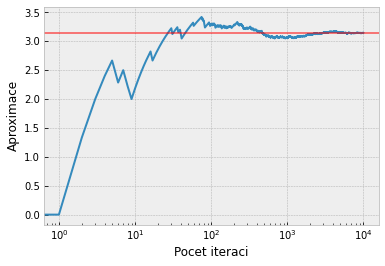

In [144]:
def aproximace_pi_monte_carlo(pocet_pokusu):
    zasahy = 0
    aproximace = np.empty(pocet_pokusu)
    
    for i in range(pocet_pokusu):
        nahodne_x = np.random.uniform(-1, 1)
        nahodne_y = np.random.uniform(-1, 1)
        zasahy += 1 if nahodne_x**2 + nahodne_y**2 <= 1 else 0
        aproximace[i] = 4 * zasahy/(i+1)

    plt.semilogx(aproximace)
    plt.xlabel("Pocet iteraci")
    plt.ylabel("Aproximace")
    plt.axhline(np.pi, color="r", alpha=0.5);

    return aproximace

aproximace = aproximace_pi_monte_carlo(10000)


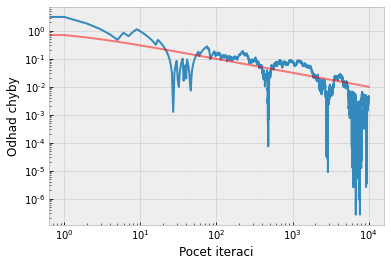

In [145]:
pocet_hodnot = len(aproximace)
plt.loglog(np.arange(pocet_hodnot), np.abs(aproximace-np.pi))
plt.loglog(1/np.sqrt(np.arange(pocet_hodnot)+1), color="r", alpha=0.5)
plt.xlabel("Pocet iteraci")
plt.ylabel("Odhad chyby");

#### Cvičení 2: Objem N-dimenzionální koule

Program z předchozího cvičení lze rychlou úpravou převést na výpočet N-dimenzionální krychle. Napište funkci, do které zadáte počet poloměr koule, počet dimenzí a počet iterací a program vrátí objem takové koule. Porovnejte výslednou aproximaci s teoretickým výsledkem.

In [150]:
def objem_nkoule(polomer, pocet_dimenzi, pocet_iteraci):
    zasahy = 0
    nahodny_bod = [np.random.uniform(0, 2*polomer, pocet_dimenzi) for i in range(pocet_iteraci)]
    zasahy = np.sum(list(filter(lambda x: np.sum([xi**2 for xi in x]) <= polomer, nahodny_bod)))
    objem_nkrychle = 2*polomer*pocet_dimenzi
    return objem_nkrychle*zasahy/pocet_iteraci

print(objem_nkoule(1, 1, 100000))
print(objem_nkoule(1, 2, 100000))
print(objem_nkoule(1, 3, 100000))
print(objem_nkoule(1, 4, 100000))
print(objem_nkoule(1, 5, 100000))

0.5001814402018493
0.6722128204972225
0.4355120097232992
0.21143025932227114
0.08129866847358672


#### Výpočet určitého integrálu

In [163]:
def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))
    xs = np.random.uniform(a, b, pocet_vzorku)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)])
    return (b-a)*max_f*hits/pocet_vzorku

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

3.9848
0.6588


#### Statistické rozdělení

### 8.3 Aplikace metody Monte Carlo

#### Optimalizace portfolia akcií

In [ ]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
 
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)
 
data = pdr.get_data_yahoo(tickers, start)
data = data['Adj Close']

In [ ]:
log_returns = np.log(data/data.shift())

In [ ]:
# Monte Carlo Simulation
n = 5000
 
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
 
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

#### Simulace ideálního plynu

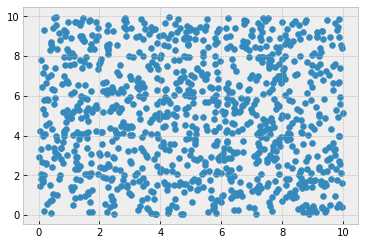

In [255]:
from numpy.random import uniform

def pocatecni_polohy(pocet_castic, simulacni_krabice):
    return np.array([uniform(simulacni_krabice[0], simulacni_krabice[1], size=2)
                    for i in range(pocet_castic)])

def vykresli_castice(polohy):
    plt.scatter(polohy[:,0], polohy[:,1])

def main():
    polohy = pocatecni_polohy(pocet_castic=1000, simulacni_krabice=(0, 10))
    vykresli_castice(polohy)

if __name__ == "__main__":
    main()

In [181]:
from numpy.random import permutation

print(permutation([-1, 0, 1], ))

[ 0 -1  1]


#### Isingův model magnetismu

Isingův model představuje matematický model feromagnetismu ze statistické fyziky. Model se skládá z magnetických dipólů (spinů), které mohou být ve dvou hodnotách (up=1, down=-1). Spiny se nacházejí ve mřížce a mohou interagovat se svými sousedy. Pokud je natočení dvou párů spinů stejné, pak mají nižší energii než při opačném natočení. Systém se snaží dostat samovolně do stavu s minimální energií, ale tento přechod je narušován teplem, což umožňuje sledovat v modelu fázové přechody.

Isingův model je obtížné vyřešit analytickým způsobem (jak bude vypadat výsledné natočení spinů v daném čase), proto se řeší numerickým řešením například pomocí metody Monte Carlo. Konkrétně se využívá verze Monte Carlo algoritmu, které se jmenuje Metropolisův-Hastingsův algoritmus.

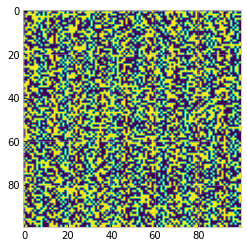

In [261]:
from numpy.random import choice, randint, permutation, random
import matplotlib.pyplot as plt

def pocatecni_stav(vyska, sirka):
    return np.matrix([[choice([-1, 1]) for j in range(sirka)] for i in range(vyska)])

def zobraz_spiny(matice):
    return plt.imshow(matice)

def vyber_nahodny_spin(matice):
    return (randint(0, matice.shape[0]), randint(0, matice.shape[1]))

def otoc_spin(matice, spin):
    matice[spin[0], spin[1]] *= -1

def energie_interakce(matice, i, j):
    okolni_spiny = [matice[min(i+k, len(matice)-1), min(j+l, len(matice)-1)] 
                    for k in range(-1, 2) for l in range(-1, 2) 
                    if abs(k + l) == 1]
    return matice[i,j]*sum(okolni_spiny)

def hamiltonian(matice, J=1):
    return J*sum([energie_interakce(matice, i, j) for i in range(len(matice)) for j in range(len(matice))])

def metropolis(matice, beta, i, j):
    energie_pred_zmenou = energie_interakce(matice, i, j)
    otoc_spin(matice, (i, j))
    energie_po_zmene = energie_interakce(matice, i, j)
    if energie_po_zmene > energie_pred_zmenou and random() > np.exp(-beta):
        otoc_spin(matice, (i, j))
    return energie_po_zmene - energie_pred_zmenou

def monte_carlo(matice, pocet_iteraci, teplota, energie, J=1):
    for iterace in range(pocet_iteraci):
        nahodny_spin = vyber_nahodny_spin(matice)
        energie.append(energie[-1] + metropolis(matice, teplota, nahodny_spin[0], nahodny_spin[1]))    

def main():
    ising = pocatecni_stav(vyska=100, sirka=100)
    zobraz_spiny(ising)
    energie = [hamiltonian(ising)]
    monte_carlo(matice=ising, pocet_iteraci=100000, teplota=0.5, energie=energie)
    zobraz_spiny(ising)

if __name__ == "__main__":
    main()